# Feed activity

Plots of how active the feed has been in some given time period.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta, date
from pathlib import Path

In [2]:
posts = pd.read_parquet("../data/feed_astro_posts.parquet")  # Requires running download_posts.py
accounts = pd.read_parquet("../data/accounts.parquet")

## Pre-process into valid posts only

In [3]:
print("Posts before:", len(posts))
posts = posts.loc[np.isin(posts['author'], accounts.query("is_valid == 1")["did"])].reset_index(drop=True)
print("Posts after:", len(posts))

# Also, join handles into posts
posts = posts.merge(accounts[["did", "handle"]], left_on="author", right_on="did", how="left")

Posts before: 18387
Posts after: 18317


## Posts over time

In [4]:
posts

,id,indexed_at,uri,cid,author,text,feed_all,feed_astro,feed_exoplanets,feed_astrophotos,did,handle
0,208,2023-07-09 20:07:37,at://did:plc:jcoy7v3a2t4rcfdh6i4kza25/app.bsky...,zdpuAtchhhJhqsCDexTy4vMA6eyf2zW2MRQVTQy9soT9bSy26,did:plc:jcoy7v3a2t4rcfdh6i4kza25,"cheeky test post, if this works then we have a...",1,1,0,0,did:plc:jcoy7v3a2t4rcfdh6i4kza25,emily.space
1,210,2023-07-09 20:11:45,at://did:plc:jcoy7v3a2t4rcfdh6i4kza25/app.bsky...,zdpuB1yNordR5vcfviTxugNsDWAmF9re1jrJG4xrjJxGjUJpy,did:plc:jcoy7v3a2t4rcfdh6i4kza25,"Astronomers of Bluesky (Astroskeets?), we have...",1,1,0,0,did:plc:jcoy7v3a2t4rcfdh6i4kza25,emily.space
2,212,2023-07-09 20:17:25,at://did:plc:jcoy7v3a2t4rcfdh6i4kza25/app.bsky...,zdpuB2CJrDkLfmvHNh7oyniBdT7CfxhRXQCwyZgfi1oXaMRgH,did:plc:jcoy7v3a2t4rcfdh6i4kza25,"The Astrosky feed will still be supported, and...",1,1,0,0,did:plc:jcoy7v3a2t4rcfdh6i4kza25,emily.space
3,213,2023-07-09 20:23:19,at://did:plc:5jewtobl3twykx3n7iihg4qo/app.bsky...,zdpuAoEWvds81pTtG6EzcEB9HZLNsJvoj2EDCRQFVzakc1sYv,did:plc:5jewtobl3twykx3n7iihg4qo,For the astronomy feed: ????,1,1,0,0,did:plc:5jewtobl3twykx3n7iihg4qo,astroprofhoff.bsky.social
4,221,2023-07-09 20:56:21,at://did:plc:jcoy7v3a2t4rcfdh6i4kza25/app.bsky...,zdpuAnCPJpNpwyogZLHsziPpbfzE7dwxpyqUJU7fPb8db9iD3,did:plc:jcoy7v3a2t4rcfdh6i4kza25,Time for an astronomy post! ????????\n\nMy abs...,1,1,0,0,did:plc:jcoy7v3a2t4rcfdh6i4kza25,emily.space
...,...,...,...,...,...,...,...,...,...,...,...,...
18524,335928,2024-09-02 12:23:05,at://did:plc:xt6b26ckpj5adnc7njmbzrgz/app.bsky...,bafyreif3le3emu6lt376ty7po4hmh4yke7axxqukr7fvp...,did:plc:xt6b26ckpj5adnc7njmbzrgz,Galáxia espiral barrada.\nAndrômeda.\n\nTelesc...,1,1,0,0,did:plc:xt6b26ckpj5adnc7njmbzrgz,pamphlet.army.social
18525,335945,2024-09-02 12:36:41,at://did:plc:t5yjf3iirxqctylclrawr4ew/app.bsky...,bafyreid2z6rjbent3f2bljr3tzl3ccgoq4ojso6phxp24...,did:plc:t5yjf3iirxqctylclrawr4ew,Beautiful. Can also follow @apod.shinyakato.de...,1,1,0,0,did:plc:t5yjf3iirxqctylclrawr4ew,karenlmasters.bsky.social
18526,335978,2024-09-02 13:01:49,at://did:plc:nbpntaipwqfpf4jwmu6rhgqe/app.bsky...,bafyreig5evjonvzis5yfnjbyinfjaotjkpcv34xq6zh4g...,did:plc:nbpntaipwqfpf4jwmu6rhgqe,Having fun processing some photos I pulled off...,1,1,0,0,did:plc:nbpntaipwqfpf4jwmu6rhgqe,astromikemerri.bsky.social
18527,336007,2024-09-02 13:20:13,at://did:plc:4aa2mtfyjewhfg7uinr7hti4/app.bsky...,bafyreigncoks6togb4krtc6oriauiv27r2yh74roa6x4s...,did:plc:4aa2mtfyjewhfg7uinr7hti4,Interesting comparison I learned in Stefan Gil...,1,1,0,0,did:plc:4aa2mtfyjewhfg7uinr7hti4,mpoessel.bsky.social


In [5]:
aggregator = dict(
    feed_astro="sum", feed_exoplanets="sum", feed_astrophotos="sum", author="nunique"
)

by_day = posts.groupby(by=posts["indexed_at"].dt.date).aggregate(aggregator).reset_index()
by_day_of_the_week = posts.groupby(by=posts["indexed_at"].dt.strftime('%w')).aggregate(aggregator).reset_index()
by_week = posts.groupby(by=posts["indexed_at"].dt.strftime('%Y%W')).aggregate(aggregator).reset_index()
by_month = posts.groupby(by=posts["indexed_at"].dt.strftime('%Y%m')).aggregate(aggregator).reset_index()

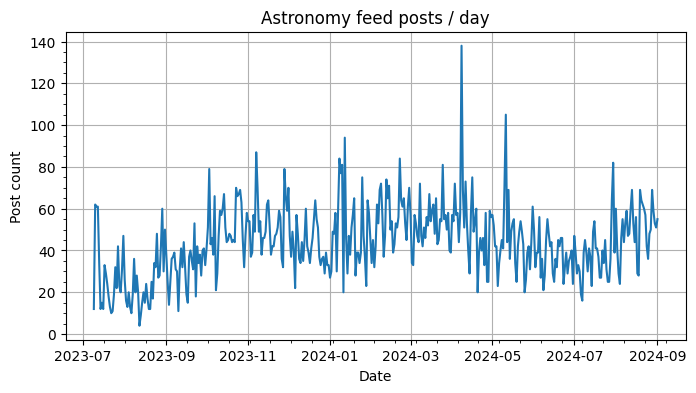

In [6]:
days_to_plot = by_day.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'])
ax.set(title="Astronomy feed posts / day", xlabel="Date", ylabel="Post count")
ax.grid()
ax.minorticks_on()

fig.savefig("output/posts_per_day.png", bbox_inches="tight")

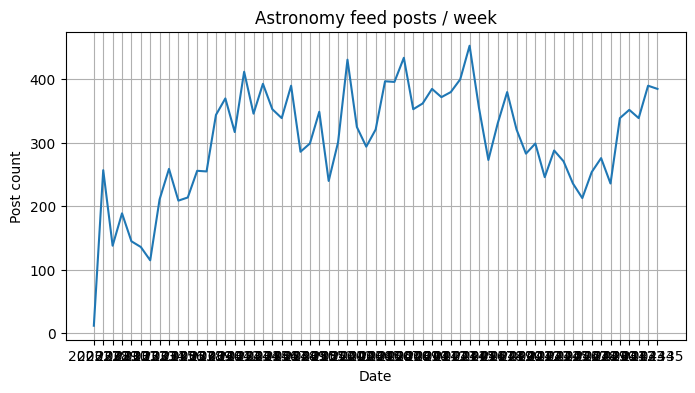

In [7]:
days_to_plot = by_week.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'])
ax.set(title="Astronomy feed posts / week", xlabel="Date", ylabel="Post count")
ax.grid()
#ax.minorticks_on()

fig.savefig("output/posts_per_week.png", bbox_inches="tight")

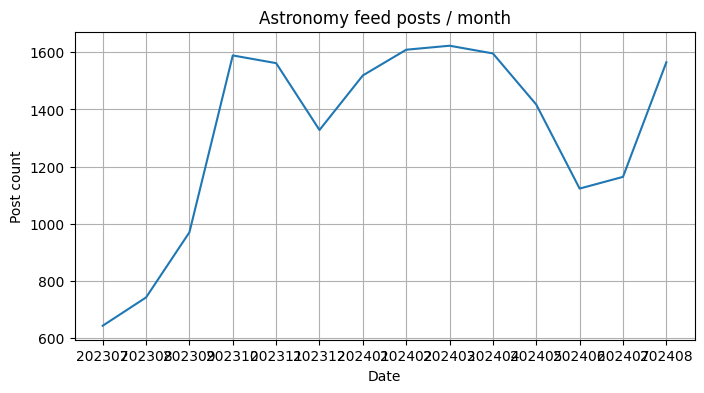

In [8]:
days_to_plot = by_month.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'])
ax.set(title="Astronomy feed posts / month", xlabel="Date", ylabel="Post count")
ax.grid()
#ax.minorticks_on()

fig.savefig("output/posts_per_month.png", bbox_inches="tight")

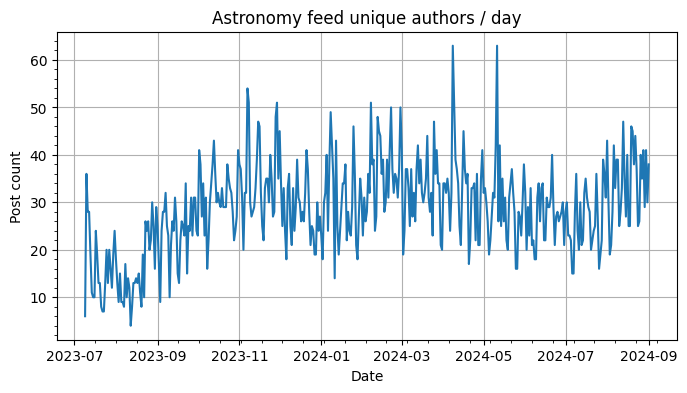

In [9]:
days_to_plot = by_day.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
# ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'])
ax.plot(days_to_plot['indexed_at'], days_to_plot['author'])
ax.set(title="Astronomy feed unique authors / day", xlabel="Date", ylabel="Post count")
ax.grid()
ax.minorticks_on()

fig.savefig("output/authors_per_day.png", bbox_inches="tight")

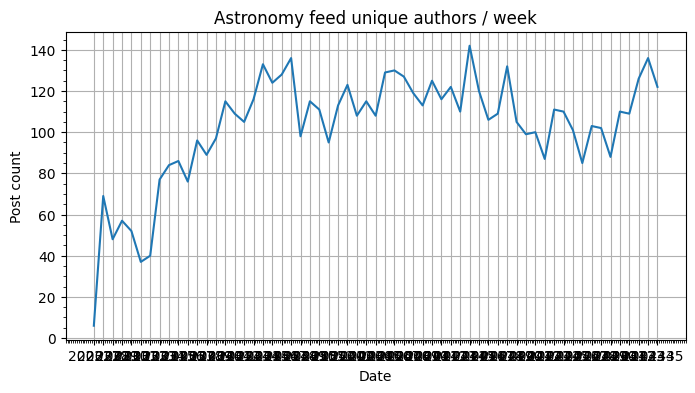

In [10]:
days_to_plot = by_week.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
# ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'])
ax.plot(days_to_plot['indexed_at'], days_to_plot['author'])
ax.set(title="Astronomy feed unique authors / week", xlabel="Date", ylabel="Post count")
ax.grid()
ax.minorticks_on()

fig.savefig("output/authors_per_week.png", bbox_inches="tight")

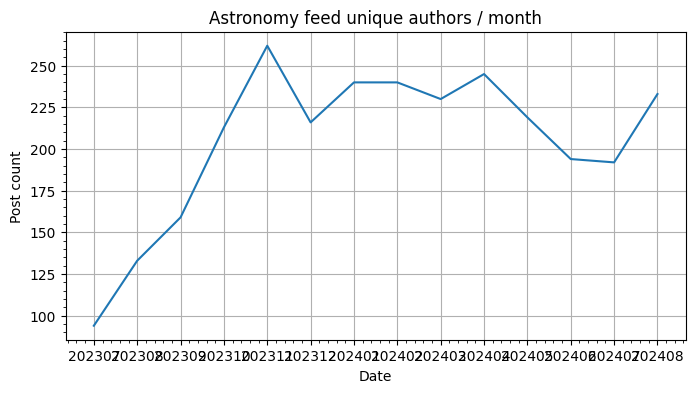

In [11]:
days_to_plot = by_month.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
# ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'])
ax.plot(days_to_plot['indexed_at'], days_to_plot['author'])
ax.set(title="Astronomy feed unique authors / month", xlabel="Date", ylabel="Post count")
ax.grid()
ax.minorticks_on()

fig.savefig("output/authors_per_month.png", bbox_inches="tight")

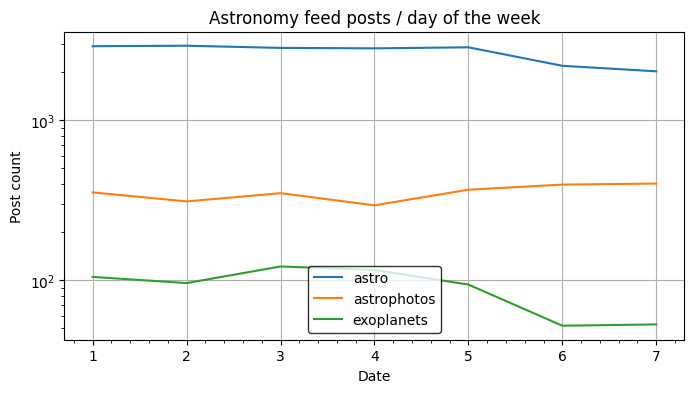

In [12]:
days_to_plot = by_day_of_the_week.copy()
days_to_plot['indexed_at'] = (days_to_plot['indexed_at'].astype(int) + 6) % 7 + 1
days_to_plot = days_to_plot.sort_values("indexed_at")

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
# ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'])
ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'], label="astro")
ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astrophotos'], label="astrophotos")
ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_exoplanets'], label="exoplanets")
ax.set(title="Astronomy feed posts / day of the week", xlabel="Date", ylabel="Post count", yscale="log")
ax.grid()
ax.minorticks_on()
ax.legend(edgecolor="k")

fig.savefig("output/posts_per_day_of_the_week.png", bbox_inches="tight")